# Titanic Data

## Summary Statistics

In [1]:
%matplotlib inline

#Importing Modules
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in Data
df = pd.read_csv('../datasets/titanic/train.csv') 


In [3]:
#Data diagnostics

# It is often a good idea to always start with a question that might affect the target variable you are trying to predict. 
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gill, Mr. John William",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df['Survived'].mean()

0.38383838383838381

In [10]:
df.groupby('Sex')['Survived'].mean() #Groupby groups dataframe with selected variables so you can perform statistics on each group

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
df.groupby('Sex')['Survived'].size() #Size counts the number in each group

Sex
female    314
male      577
dtype: int64

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
df['Fare_bins'] = pd.cut(df['Fare'],bins=[0,20,50,80,1000]) #Categorizing numerical data into bins for easy groupby
df.groupby('Fare_bins')['Survived'].mean()

Fare_bins
(0, 20]       0.284000
(20, 50]      0.416667
(50, 80]      0.604651
(80, 1000]    0.770270
Name: Survived, dtype: float64

In [15]:
df.groupby(['Sex','Fare_bins'])['Survived'].mean()

Sex     Fare_bins 
female  (0, 20]       0.669014
        (20, 50]      0.658824
        (50, 80]      0.923077
        (80, 1000]    0.958333
male    (0, 20]       0.131285
        (20, 50]      0.259542
        (50, 80]      0.340426
        (80, 1000]    0.423077
Name: Survived, dtype: float64

In [16]:
df.groupby(['Sex','Fare_bins'])['Survived'].agg([np.mean,np.size,np.std])

mean  size       std
Sex    Fare_bins                           
female (0, 20]     0.669014   142  0.472234
       (20, 50]    0.658824    85  0.476918
       (50, 80]    0.923077    39  0.269953
       (80, 1000]  0.958333    48  0.201941
male   (0, 20]     0.131285   358  0.338184
       (20, 50]    0.259542   131  0.440066
       (50, 80]    0.340426    47  0.478975
       (80, 1000]  0.423077    26  0.503831

In [17]:
df.isnull().sum() #Counts missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fare_bins       15
dtype: int64

In [18]:
def countInfs(series):
    #Counts infinite values for a particular column
    if (series.dtype == 'int64') | (series.dtype == 'float64'):
        return sum((series > 1e20) | (series < -1e20))
    else:
        return 0

In [19]:
df.select_dtypes(include=[np.number]).apply(countInfs,axis=0)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [20]:
df['SibSp'].value_counts() #Tabulates counts of each unique value

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Data Visualizations

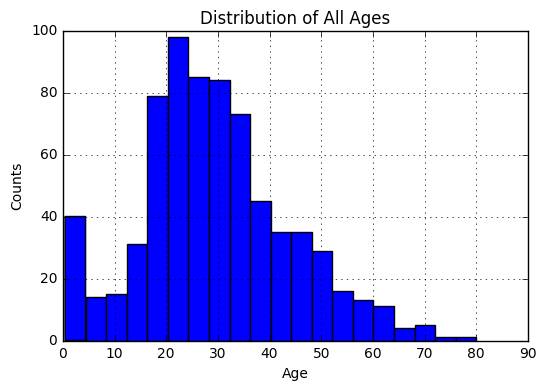

In [21]:
#Pandas Histogram
df['Age'].hist(bins=20)
plt.title('Distribution of All Ages')
plt.xlabel('Age')
plt.ylabel('Counts')


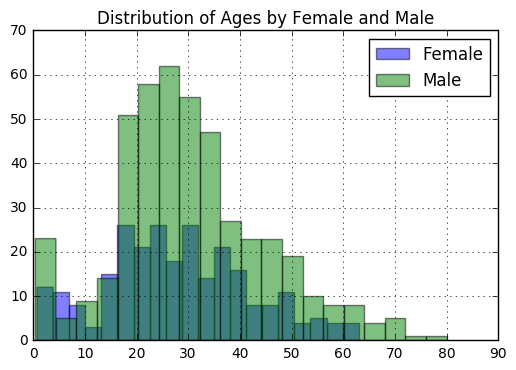

In [22]:
#Pandas Group By Histogram with Transparency
df.groupby('Sex')['Age'].hist(bins=20,alpha=0.5)
plt.legend(labels=['Female','Male'])
plt.title('Distribution of Ages by Female and Male')

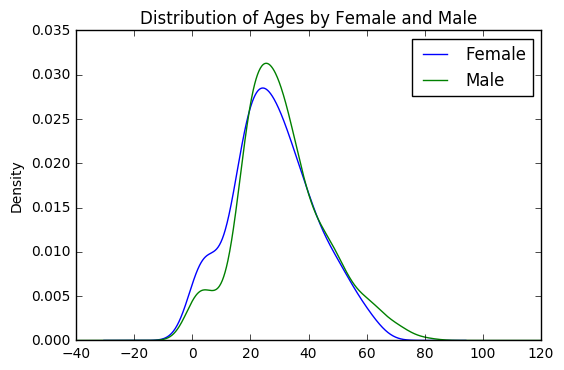

In [23]:
#Pandas Group By Density
df.groupby('Sex')['Age'].plot(kind='density')
plt.legend(labels=['Female','Male'])
plt.title('Distribution of Ages by Female and Male')

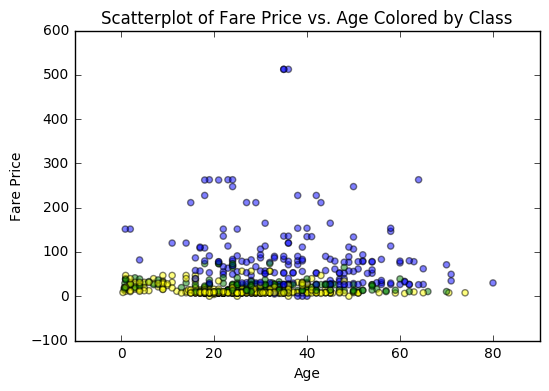

In [24]:
#Pandas Scatterplot
colors = ['blue','green','yellow']
plt.scatter(df['Age'],df['Fare'],c=df[df.Age.notnull()]['Pclass'].apply(lambda x: colors[x-1]),alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare Price')
plt.title('Scatterplot of Fare Price vs. Age Colored by Class')


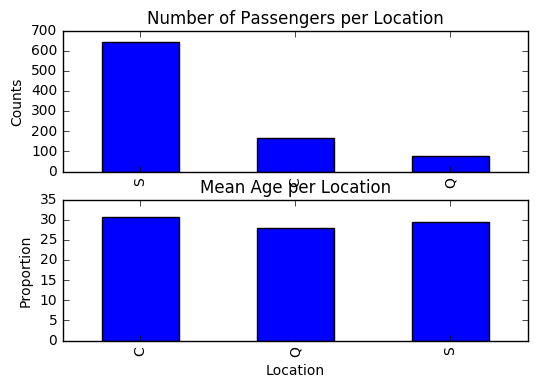

In [25]:
#Subplots
fig, axes = plt.subplots(2,1)
df.Embarked.value_counts().plot(ax=axes[0],kind='bar')
df.groupby('Embarked')['Age'].mean().plot(ax=axes[1],kind='bar')
axes[0].set_title("Number of Passengers per Location")
axes[1].set_title("Mean Age per Location")
axes[1].set_xlabel("Location")
axes[0].set_ylabel("Counts")
axes[1].set_ylabel("Proportion")

## Prettier Data Visualizations - Seaborn

In [26]:
!pip install seaborn

    100% |################################| 163kB 297kB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


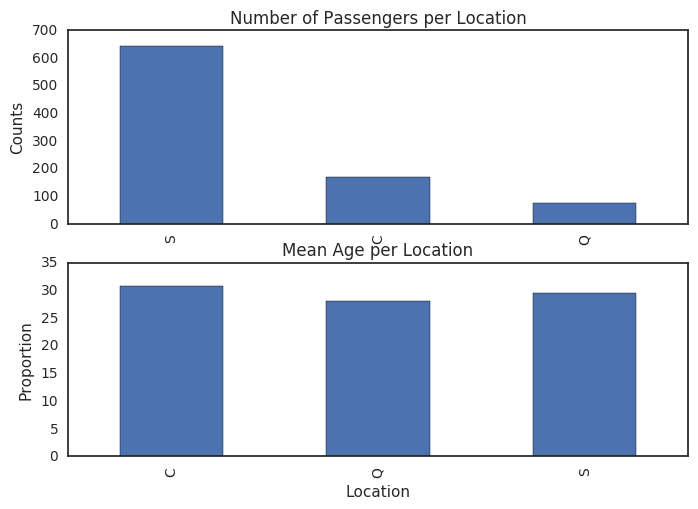

In [27]:
import seaborn as sns
#~/anaconda/bin/pip install seaborn if using anaconda, otherwise just use pip install

sns.set_style("white")

fig, axes = plt.subplots(2,1)
df.Embarked.value_counts().plot(ax=axes[0],kind='bar')
df.groupby('Embarked')['Age'].mean().plot(ax=axes[1],kind='bar')
axes[0].set_title("Number of Passengers per Location")
axes[1].set_title("Mean Age per Location")
axes[1].set_xlabel("Location")
axes[0].set_ylabel("Counts")
axes[1].set_ylabel("Proportion")

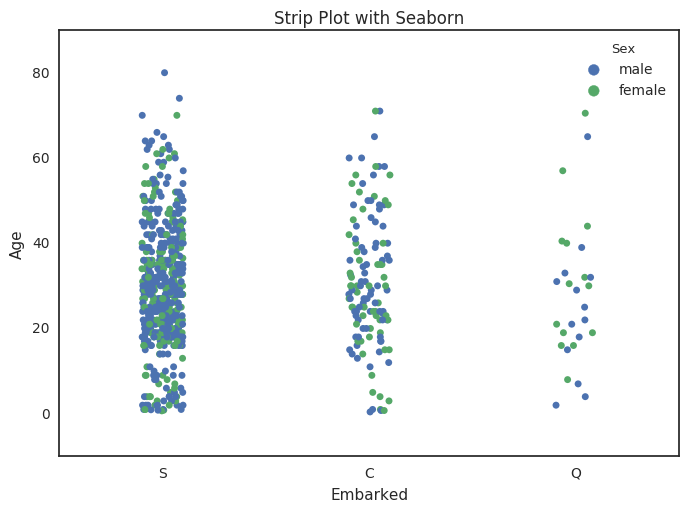

In [28]:
sns.stripplot(x="Embarked", y="Age", hue='Sex', data=df, jitter=True);
sns.plt.title("Strip Plot with Seaborn")


## Visualizing Missing Data

In [29]:
!pip install missingno

  Running setup.py bdist_wheel for missingno ... - done
  Stored in directory: /root/.cache/pip/wheels/34/71/f5/950a80f00b61cc3ed7cb7fbe05a5055c266ae0f2b5fdc07cee
Successfully built missingno


AttributeError: 'AxesSubplot' object has no attribute 'set_facecolor'

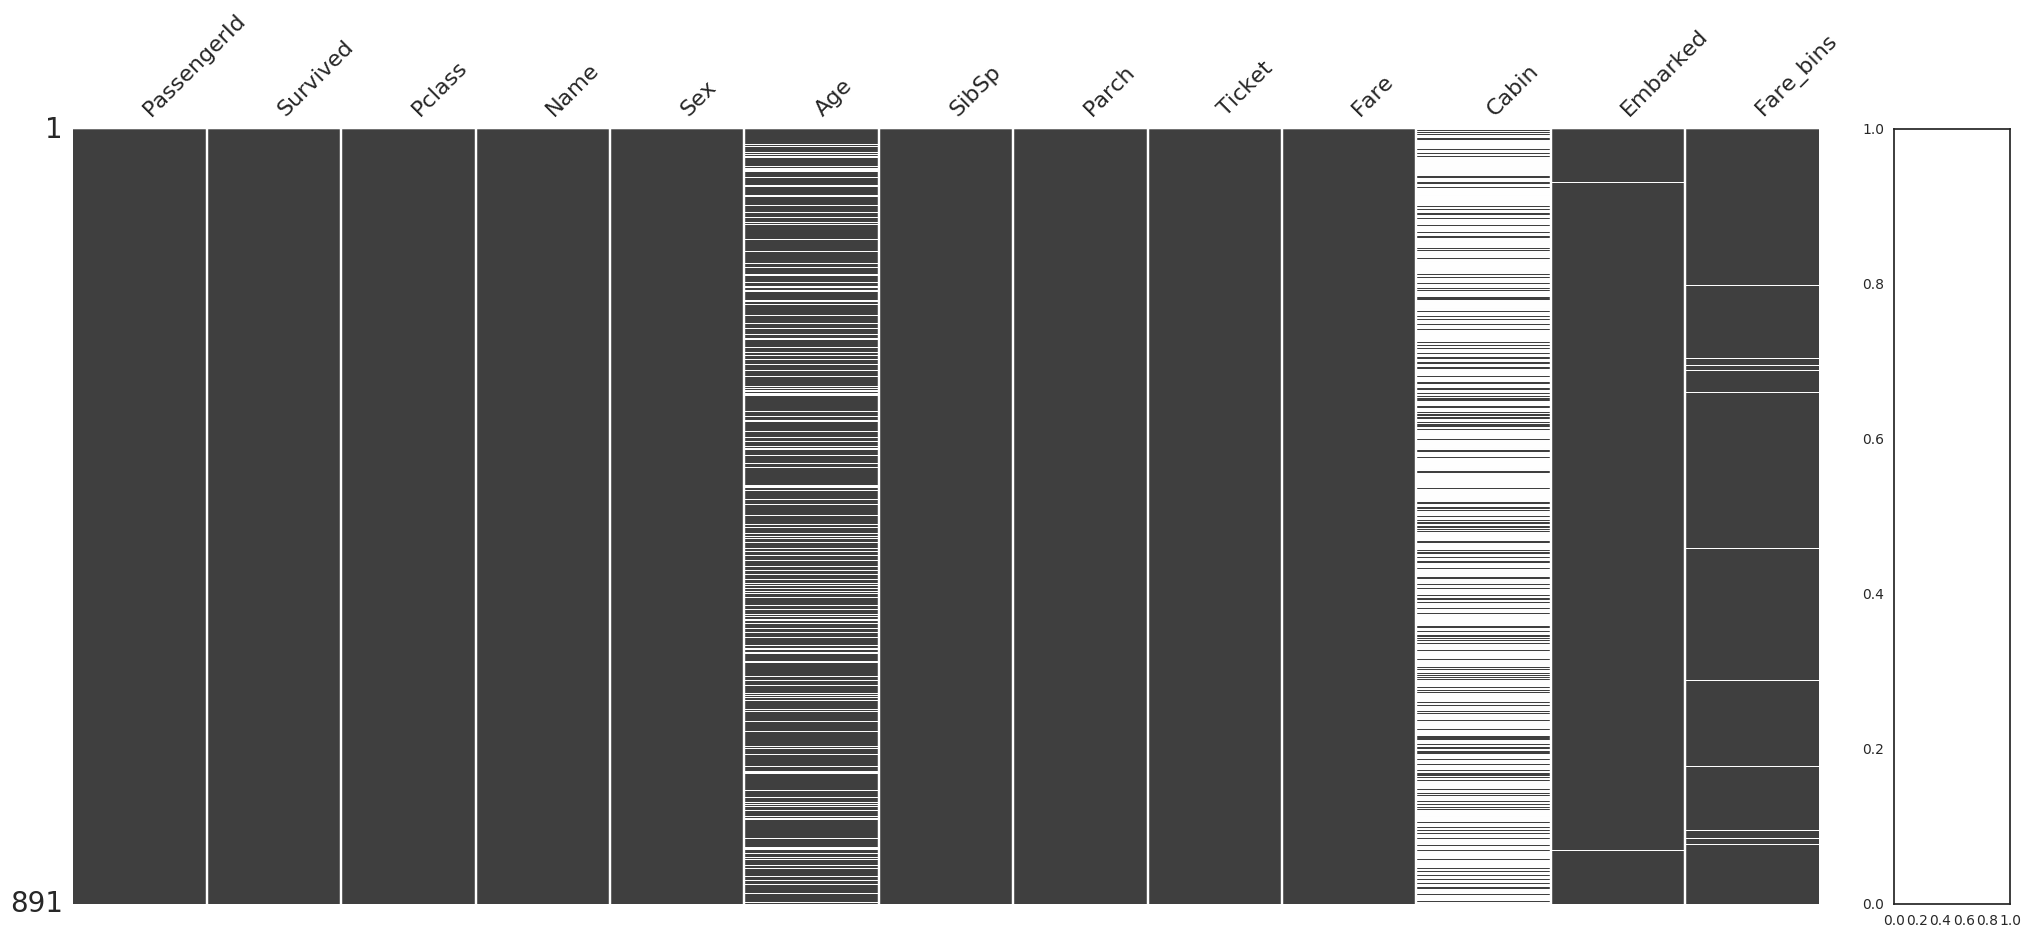

In [31]:
import missingno as msno
msno.matrix(df)